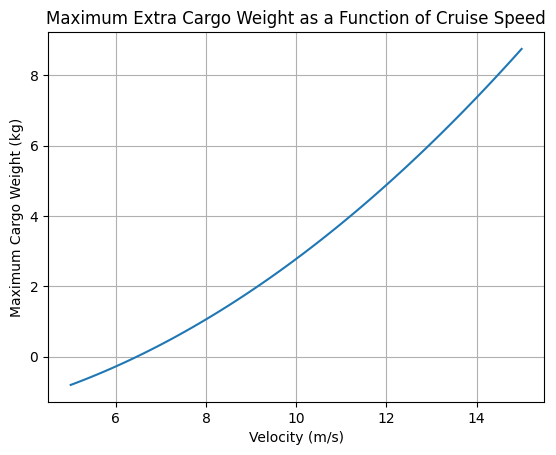

In [2]:
import matplotlib.pyplot as plt
import numpy as np

velocity_range = np.linspace(5, 15, 100)
extra_cargo_weight = (1.225 * np.pi * velocity_range**2 * 0.174 * 0.7 - 19.62) / 9.81

plt.figure()
plt.plot(velocity_range, extra_cargo_weight, label="Max Cargo Weight")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Maximum Cargo Weight (kg)")
plt.title("Maximum Extra Cargo Weight as a Function of Cruise Speed")
plt.grid(True)
plt.show()

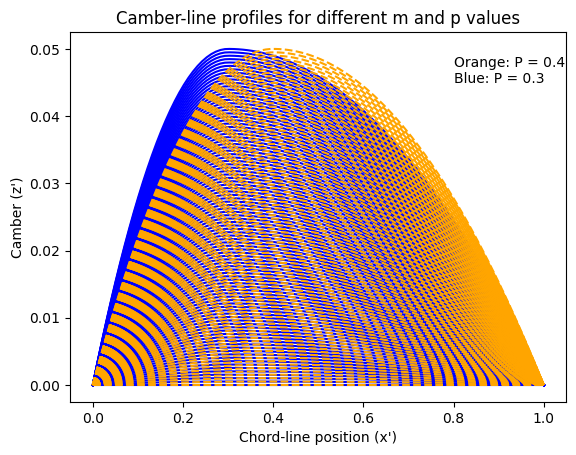

In [77]:
#2.1
plt.figure()
for m in m_values:
    z_prime_1 = m / (p_values[0]**2) * (2 * p_values[0] * x_prime - x_prime**2)
    z_prime_2 = m / ((1 - p_values[0])**2) * (1 - 2 * p_values[0] + 2 * p_values[0] * x_prime - x_prime**2)
    z_prime_2[x_prime <= p_values[0]] = z_prime_1[x_prime <= p_values[0]]
    plt.plot(x_prime, z_prime_2, color='blue')
for m in m_values:
    z_prime_1 = m / (p_values[1]**2) * (2 * p_values[1] * x_prime - x_prime**2)
    z_prime_2 = m / ((1 - p_values[1])**2) * (1 - 2 * p_values[1] + 2 * p_values[1] * x_prime - x_prime**2)
    z_prime_2[x_prime <= p_values[1]] = z_prime_1[x_prime <= p_values[1]]
    plt.plot(x_prime, z_prime_2, color='orange', linestyle='--')
plt.xlabel("Chord-line position (x')")
plt.ylabel("Camber (z')")
plt.title("Camber-line profiles for different m and p values")
plt.text(0.8, 0.045, "Orange: P = 0.4\nBlue: P = 0.3")
plt.show()
#Blue Lines are P = 0.3
# Orange Lines are P = 0.4


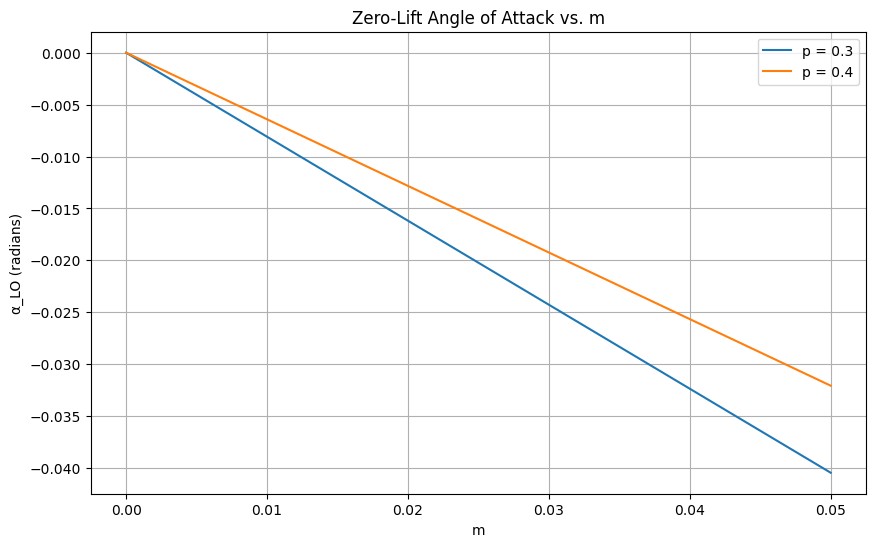

In [76]:
#2.2
import numpy as np
import matplotlib.pyplot as plt
m_values = np.linspace(0, 0.05, 100)
def alpha_LO(m, p):
    theta = np.arccos(1 - 2*p)
    term1 = -m / (np.pi * p**2) * (-2 * p * theta + 3/2 * theta + 2 * p * np.sin(theta) + 1/4 * np.sin(2 * theta) - 2 * np.sin(theta))
    term2 = -m / (np.pi * (1 - p**2)) * (2 * p * theta - 3/2 * theta - 2 * p * np.sin(theta) - 1/4 * np.sin(2 * theta) + 2 * np.sin(theta) - 2 * np.pi * p + 3/2 * np.pi)
    return term1 + term2
alpha_LO_p03 = [alpha_LO(m, 0.3) for m in m_values]
alpha_LO_p04 = [alpha_LO(m, 0.4) for m in m_values]
plt.figure(figsize=(10, 6))
plt.plot(m_values, alpha_LO_p03, label='p = 0.3')
plt.plot(m_values, alpha_LO_p04, label='p = 0.4')
plt.xlabel('m')
plt.ylabel('α_LO (radians)')
plt.title('Zero-Lift Angle of Attack vs. m')
plt.legend()
plt.grid(True)
plt.show()

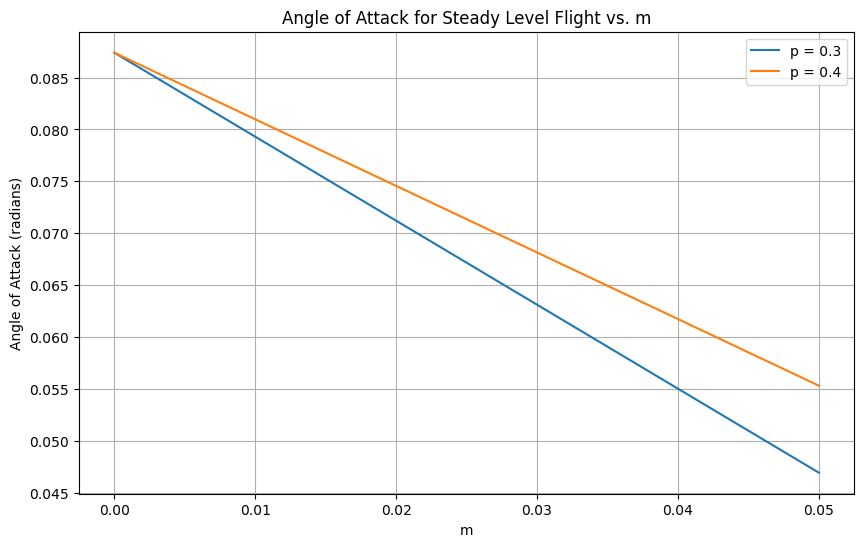

In [75]:
#2.4
import numpy as np
import matplotlib.pyplot as plt
m_values = np.linspace(0, 0.05, 100)
def alpha_LO(m, p):
    theta = np.arccos(1 - 2 * p)
    term1 = -m / (np.pi * p**2) * (-2 * p * theta + 3/2 * theta + 2 * p * np.sin(theta) + 1/4 * np.sin(2 * theta) - 2 * np.sin(theta))
    term2 = -m / (np.pi * (1 - p**2)) * (2 * p * theta - 3/2 * theta - 2 * p * np.sin(theta) - 1/4 * np.sin(2 * theta) + 2 * np.sin(theta) - 2 * np.pi * p + 3/2 * np.pi)
    return term1 + term2
alpha_LO_p03 = [alpha_LO(m, 0.3) for m in m_values]
alpha_LO_p04 = [alpha_LO(m, 0.4) for m in m_values]
alpha_p03 = [0.08739 + val for val in alpha_LO_p03]
alpha_p04 = [0.08739 + val for val in alpha_LO_p04]
plt.figure(figsize=(10, 6))
plt.plot(m_values, alpha_p03, label='p = 0.3')
plt.plot(m_values, alpha_p04, label='p = 0.4')
plt.xlabel('m')
plt.ylabel('Angle of Attack (radians)')
plt.title('Angle of Attack for Steady Level Flight vs. m')
plt.legend()
plt.grid(True)
plt.show()

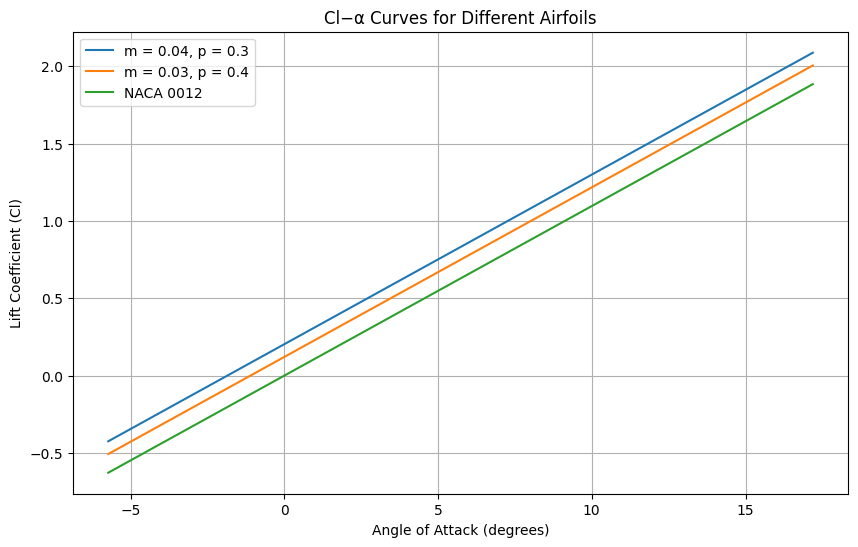

In [74]:
#2.5 degrees
import numpy as np
import matplotlib.pyplot as plt
alpha_values_rad = np.linspace(-0.1, 0.3, 100)
alpha_values_deg = [np.degrees(angle) for angle in alpha_values_rad]
def cl_alpha(alpha_deg, alpha_LO_rad):
    alpha_rad = np.radians(alpha_deg)
    return 2 * np.pi * (alpha_rad - alpha_LO_rad)
def alpha_LO(m, p):
    theta = np.arccos(1 - 2 * p)
    term1 = -m / (np.pi * p**2) * (-2 * p * theta + 3/2 * theta + 2 * p * np.sin(theta) + 1/4 * np.sin(2 * theta) - 2 * np.sin(theta))
    term2 = -m / (np.pi * (1 - p**2)) * (2 * p * theta - 3/2 * theta - 2 * p * np.sin(theta) - 1/4 * np.sin(2 * theta) + 2 * np.sin(theta) - 2 * np.pi * p + 3/2 * np.pi)
    return term1 + term2
m_p_values = [(0.04, 0.3), (0.03, 0.4)]
cl_alpha_curves = {}
for m, p in m_p_values:
    alpha_LO_value = alpha_LO(m, p)
    cl_values = [cl_alpha(alpha, alpha_LO_value) for alpha in alpha_values_deg]
    cl_alpha_curves[(m, p)] = cl_values
cl_naca0012 = [2 * np.pi * alpha_rad for alpha_rad in alpha_values_rad]
cl_naca0012_deg = [cl_alpha(angle * radians_to_degrees, 0) for angle in alpha_values_rad]
plt.figure(figsize=(10, 6))
for key, values in cl_alpha_curves.items():
    m, p = key
    plt.plot(alpha_values_deg, values, label=f'm = {m}, p = {p}')
plt.plot(alpha_values_deg, cl_naca0012_deg, label='NACA 0012')
plt.xlabel('Angle of Attack (degrees)')
plt.ylabel('Lift Coefficient (Cl)')
plt.title('Cl−α Curves for Different Airfoils')
plt.legend()
plt.grid(True)
plt.show()

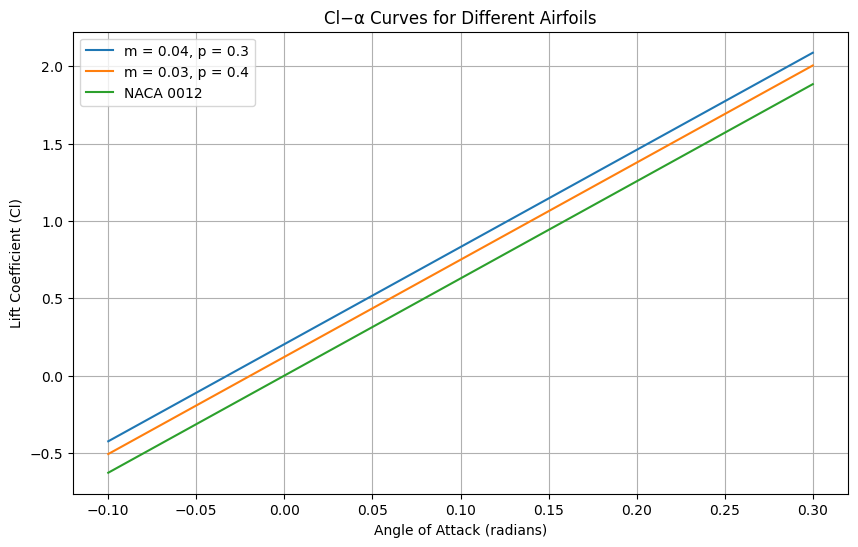

In [73]:
#2.5 radians
import numpy as np
import matplotlib.pyplot as plt
def cl_alpha(alpha, alpha_LO):
    return 2 * np.pi * (alpha - alpha_LO)
alpha_values = np.linspace(-0.1, 0.3, 100)
theta_func = lambda p: np.arccos(1 - 2 * p)
def alpha_LO(m, p):
    theta = theta_func(p)
    term1 = -m / (np.pi * p**2) * (-2 * p * theta + 3/2 * theta + 2 * p * np.sin(theta) + 1/4 * np.sin(2 * theta) - 2 * np.sin(theta))
    term2 = -m / (np.pi * (1 - p**2)) * (2 * p * theta - 3/2 * theta - 2 * p * np.sin(theta) - 1/4 * np.sin(2 * theta) + 2 * np.sin(theta) - 2 * np.pi * p + 3/2 * np.pi)
    return term1 + term2
m_p_values = [(0.04, 0.3), (0.03, 0.4)]
cl_alpha_curves = {}
for m, p in m_p_values:
    alpha_LO_value = alpha_LO(m, p)
    cl_values = [cl_alpha(alpha, alpha_LO_value) for alpha in alpha_values]
    cl_alpha_curves[(m, p)] = cl_values
cl_naca0012 = [2 * np.pi * alpha for alpha in alpha_values]
plt.figure(figsize=(10, 6))
for key, values in cl_alpha_curves.items():
    m, p = key
    plt.plot(alpha_values, values, label=f'm = {m}, p = {p}')
plt.plot(alpha_values, cl_naca0012, label='NACA 0012')
plt.xlabel('Angle of Attack (radians)')
plt.ylabel('Lift Coefficient (Cl)')
plt.title('Cl−α Curves for Different Airfoils')
plt.legend()
plt.grid(True)
plt.show()

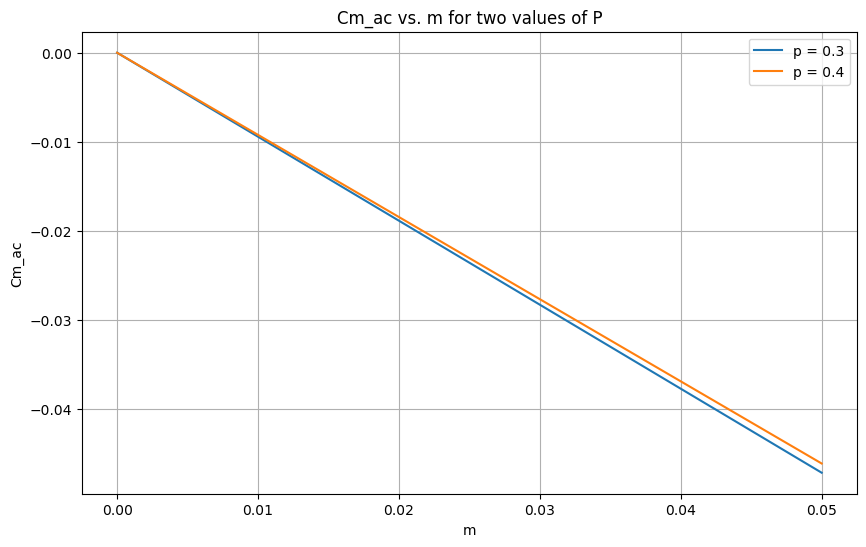

In [72]:
import numpy as np
import matplotlib.pyplot as plt
m_values = np.linspace(0, 0.05, 100)
p_values = [0.3, 0.4]
def cm_ac(m, p):
    theta = np.arccos( 1 - 2*p)
    term1 = -m * (theta - np.sin(theta)) / (np.pi * p**2)
    term2 = -m * (theta - np.sin(theta)) / (np.pi * (1 - p**2))
    return term1 + term2
plt.figure(figsize=(10, 6))
for p in p_values:
    cm_ac_values = [cm_ac(m, p) for m in m_values]
    plt.plot(m_values, cm_ac_values, label=f'p = {p}')
plt.xlabel('m')
plt.ylabel('Cm_ac')
plt.title('Cm_ac vs. m for two values of P')
plt.legend()
plt.grid(True)
plt.show()


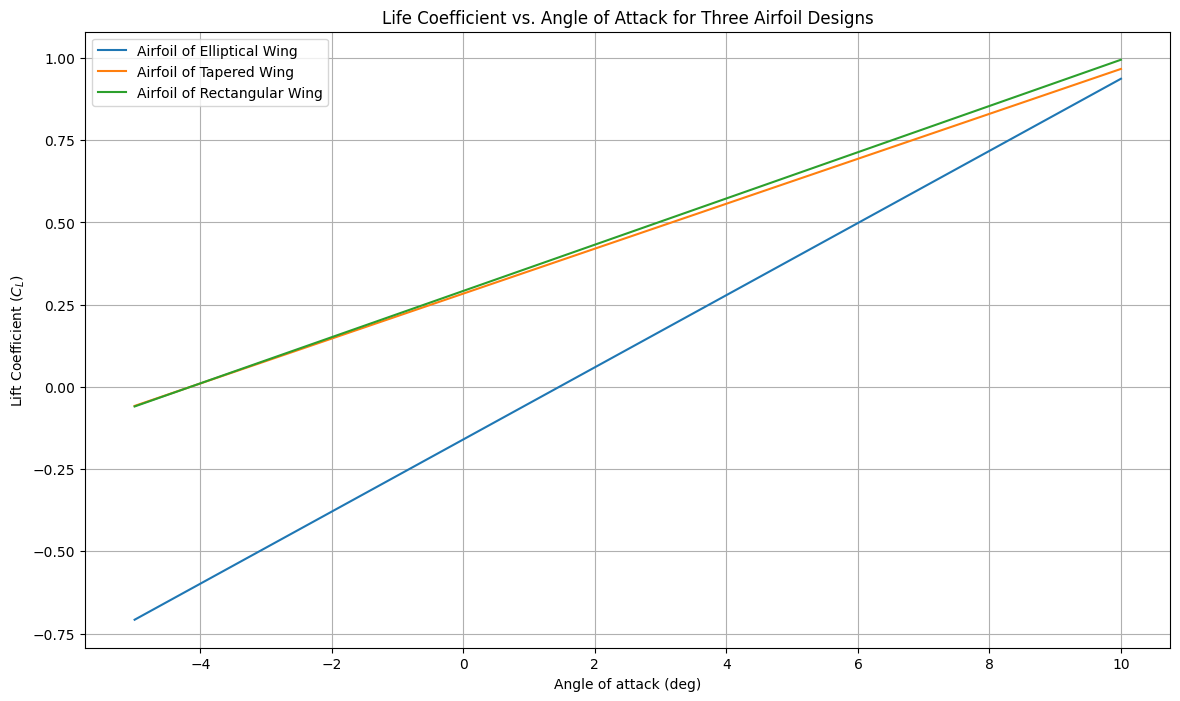

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

alo4412 = 0.07251

def clE(alpha, alo):
    return 2*pi*(alpha - 1.098/(pi*3.57) + 0.07251)

def clT(alpha, alo):
    return 3.914*(alpha + 0.07251)

def clR(alpha, alo):
    return 4.027*(alpha + 0.07251)

alpha_start = np.deg2rad(-5)
alpha_stop = np.deg2rad(10)

alpha = np.linspace(alpha_start, alpha_stop, 100)

cl2 = clE(alpha, alo4412)
cl3 = clT(alpha, alo4412)
cl4 = clR(alpha, alo4412)

plt.figure(figsize=(14,8))
plt.plot(np.rad2deg(alpha), cl2, label='Airfoil of Elliptical Wing')
plt.plot(np.rad2deg(alpha), cl3, label='Airfoil of Tapered Wing')
plt.plot(np.rad2deg(alpha), cl4, label='Airfoil of Rectangular Wing')
plt.xlabel('Angle of attack (deg)')
plt.ylabel('Lift Coefficient ($C_L$)')
plt.title('Life Coefficient vs. Angle of Attack for Three Airfoil Designs')
plt.grid(True)
plt.legend()
plt.show()